In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_data = pd.read_table('train.ft.txt', header=None, delimiter = None)
train_data.head()

,0
0,__label__2 Stuning even for the non-gamer: Thi...
1,__label__2 The best soundtrack ever to anythin...
2,__label__2 Amazing!: This soundtrack is my fav...
3,__label__2 Excellent Soundtrack: I truly like ...
4,"__label__2 Remember, Pull Your Jaw Off The Flo..."


In [ ]:
train_data['Sentiment']=train_data[0].str[:11]

In [ ]:
train_data[0]=train_data[0].str[11:]

In [ ]:
train_data.head()


,0,Sentiment
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


In [ ]:
train_data.loc[train_data['Sentiment'] == '__label__1 ','Sentiment'] = 0
train_data.loc[train_data['Sentiment'] == '__label__2 ','Sentiment'] = 1
train_data.head()

,0,Sentiment
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


In [ ]:
stp_words=stopwords.words('english')
def clean_review(review):
    cleanreview=" ".join(word for word in review.
                    split() if word not in stp_words)
    return cleanreview

train_data[0]=train_data[0].apply(clean_review)

In [ ]:
train_data.head()


,0,Sentiment
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


In [ ]:
train_data['Sentiment'].value_counts()


0    4775
1    4537
Name: Sentiment, dtype: int64

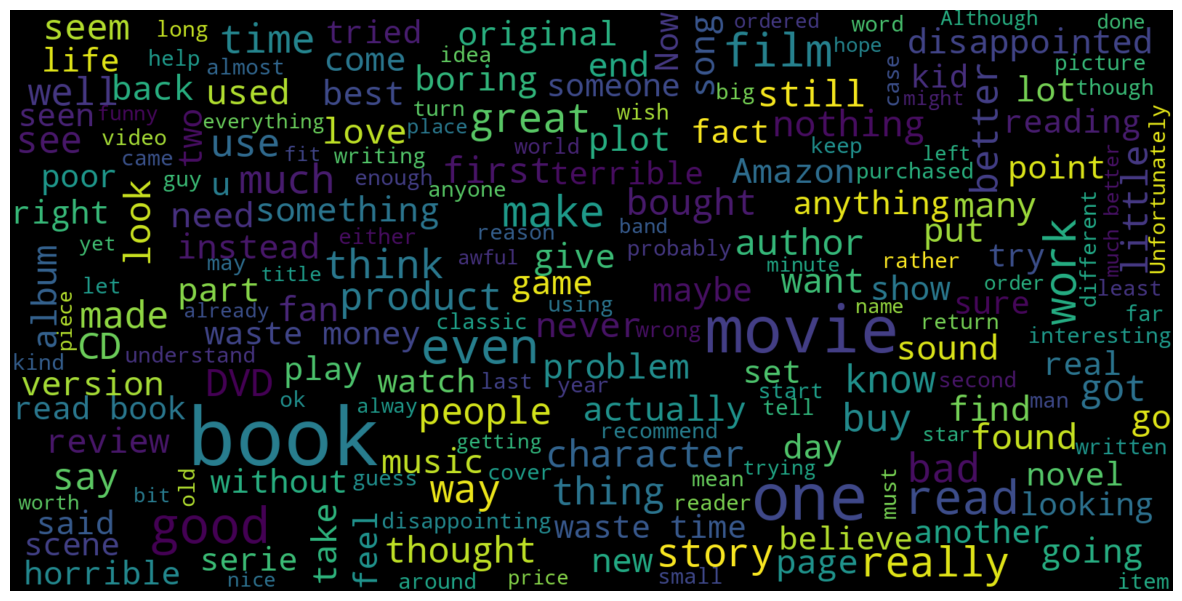

In [ ]:
consolidated=' '.join(word for word in train_data[0][train_data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

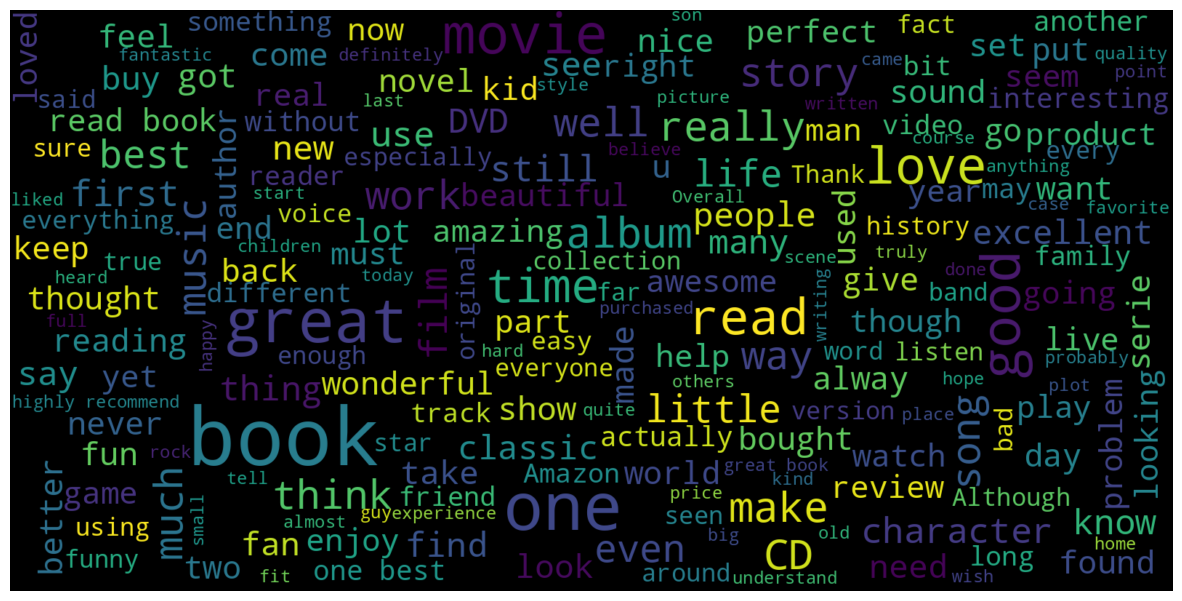

In [ ]:
consolidated=' '.join(word for word in train_data[0][train_data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(train_data[0] ).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,train_data['Sentiment'].astype('int'),test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [ ]:
model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)
#print(accuracy_score(y_test,pred))


In [ ]:
from sklearn.metrics import confusion_matrix

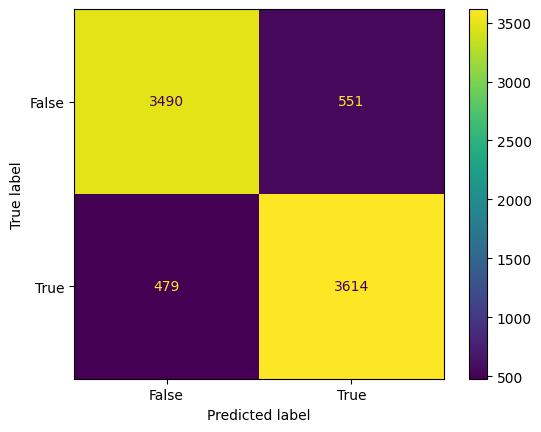

Accuracy: 0.8733710351610524


In [ ]:
from sklearn import metrics
cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = [False, True])

cm_display.plot()
plt.show()

#model accuracy
print("Accuracy:",accuracy_score(y_test,pred))

In [ ]:
#x_train ,x_test,y_train,y_test=train_test_split(X,train_data['Sentiment'].astype('int'),test_size=0.25,random_state=42)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4041
           1       0.83      0.86      0.85      4093

    accuracy                           0.84      8134
   macro avg       0.84      0.84      0.84      8134
weighted avg       0.84      0.84      0.84      8134



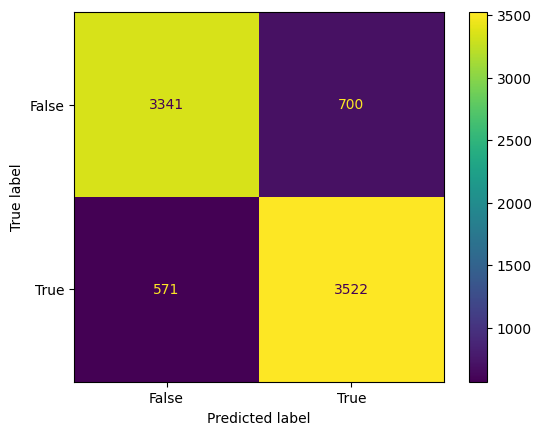

Accuracy: 0.8437423162035899
oob score: 0.8329439731136522


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
cm = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = [False, True])
cm_display.plot()
plt.show()
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
RandomForest = RandomForestClassifier(oob_score=True)
RandomForest.fit(x_train,y_train)
print("oob score:",RandomForest.oob_score_)




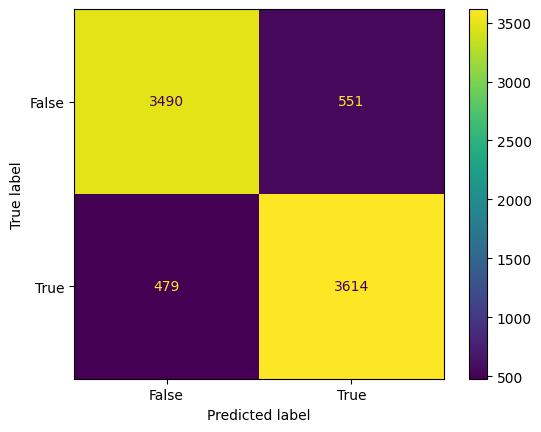

Accuracy: 0.8718957462503073


In [ ]:

import matplotlib.pyplot as plt
from sklearn.svm import SVC
#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(x_train, y_train)
#testing the model
s_pred=svm.predict(x_test)
#model accuracy
cm = confusion_matrix(y_test,pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = [False, True])
cm_display.plot()
plt.show()
print("Accuracy:",accuracy_score(y_test,s_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
# Predicting the Test set results
g_pred = classifier.predict(x_test)

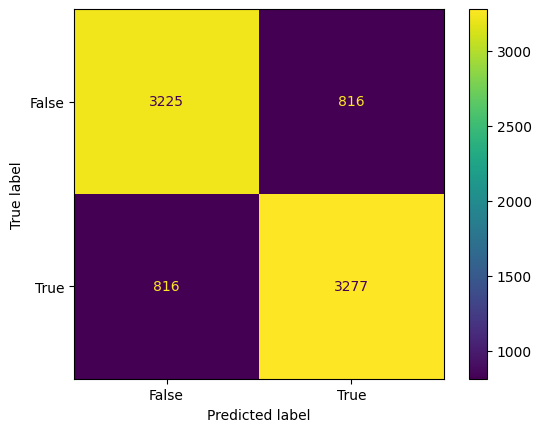

Accuracy: 0.7993607081386772


In [ ]:
#model accuracy
#print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,g_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = [False, True])
cm_display.plot()
plt.show()
print("Accuracy:",accuracy_score(y_test,g_pred))

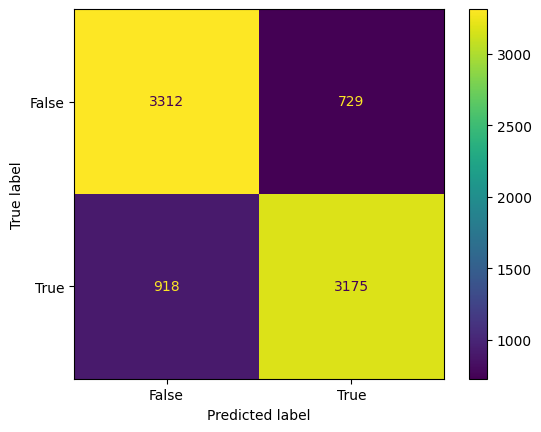

Accuracy: 0.7975165970002459


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb_model = adb.fit(x_train,y_train)
ad_pred = adb_model.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, ad_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = [False, True])
cm_display.plot()
plt.show()
print("Accuracy:", accuracy_score(y_test,ad_pred))



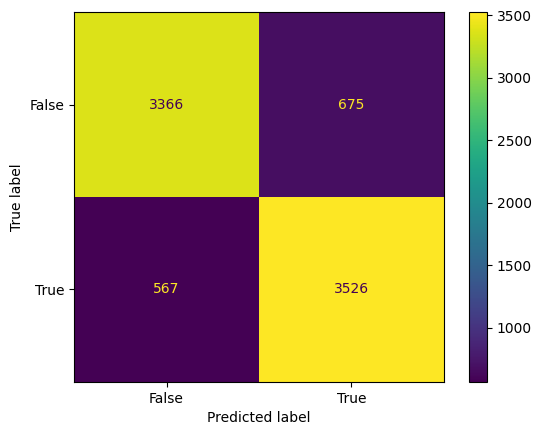

Accuracy: 0.8473075977378903


In [ ]:
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Fitting XGBoost to the training data
my_model = xgb.XGBClassifier()
my_model.fit(x_train, y_train)

# Predicting the Test set results
xg_pred = my_model.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, xg_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = [False, True])
cm_display.plot()
plt.show()
print("Accuracy:", accuracy_score(y_test,xg_pred))


